# Map clusters geographically

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
from shapely.geometry import Point

In [3]:
#import csv
path = r"C:\Users\nw431\OneDrive - University of Exeter\1_PhD Research\Project1_Carbon Model\Seagrass_Carbon_Model\outputs\cluster_df.csv"
df_cluster = pd.read_csv(path)
#convert to geopandas
df_gpd = gpd.GeoDataFrame(df_cluster, geometry = gpd.points_from_xy(df_cluster['Long'], df_cluster['Lat'], crs="EPSG:4326"))

In [4]:
#working with regions
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [5]:
df_gpd.crs == world.crs

True

In [6]:
df_gpd.crs 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

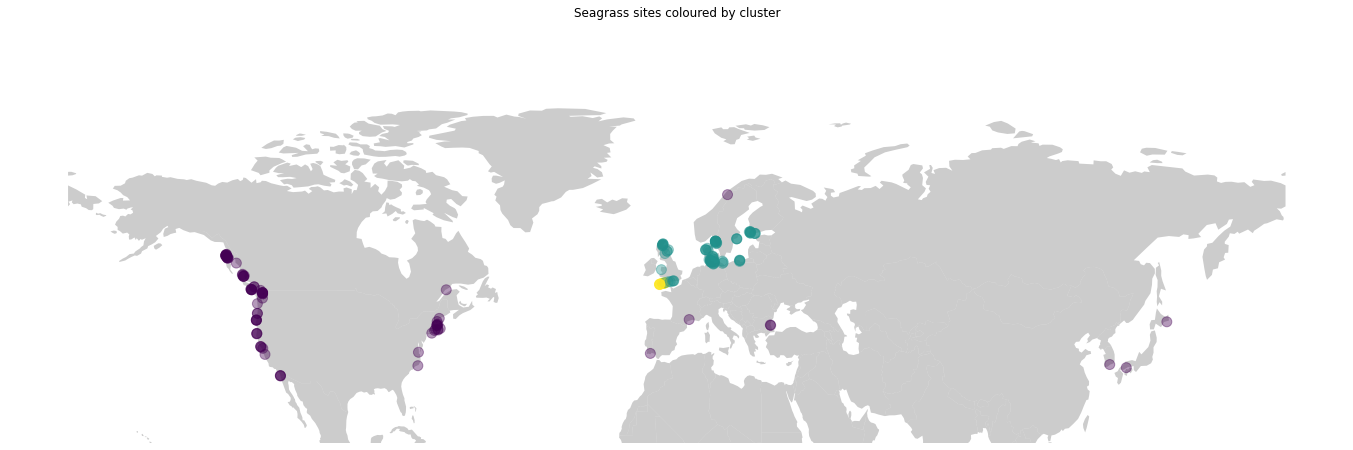

In [35]:
#map long and lat on axis with cluster coloured
fig, ax = plt.subplots(1,1, figsize = (24,18))
world.plot(ax = ax, color = 'grey', alpha = 0.4)
#c= pd.factorize(df_cluster['cluster'])[0]
df_gpd.plot(column = 'cluster', 
            cmap="viridis",        
            #c=pd.factorize(df_cluster['cluster'])[0], 
            s=100, 
            alpha =0.4, 
            ax = ax)
plt.ylim(20,100)
plt.title('Seagrass sites coloured by cluster')
ax.set_axis_off()
plt.savefig('outputs/cluster_map.jpeg')
plt.show()